In [5]:
%matplotlib inline

In [6]:
from astropy.table import Table
from scipy.stats import ks_2samp
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib.gridspec import GridSpec

In [22]:
def plot_hexbin_scatter(ax, xval, yval, imark=None,
                        gridsize=50, mincnt=20, ms=3,
                        xlabel='x values', ylabel='y values'):
    """Plot yval vs xval as a combined hexbin and scatter plot, 
    highlighting in red the items in the 'imark' list (either 
    a list of indices or a boolean masking array).
    """
    ax.plot(xval, yval, color='k', ms=2, marker='.', ls=' ', zorder=-10)
    hexbinout = ax.hexbin(xval, yval, gridsize=gridsize,
                          cmap=cm.Greys_r, mincnt=mincnt, zorder=10)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if imark is not None:
        ax.plot(xval[imark], yval[imark], color='r', ms=ms,
                marker='.', ls=' ', zorder=10)
    return(hexbinout)


In [35]:
file1 = '../ALLSFH_new_z/Cami_GOODS-N_zbest.dat'
file2 = '../ALLSFH_new_z/Cami_GOODS-S_zbest.dat'

data1 = np.loadtxt(file1)
data1[:,0] = data1[:,0]+100000
data2 = np.loadtxt(file2)
data2[:,0] = data2[:,0]+200000
data = np.concatenate((data1,data2), axis=0)

idx_hosts = np.loadtxt('../DTD_fits/host_idxs.txt', dtype=int)
mask_hosts = np.in1d(data[:,0], idx_hosts)

idx = np.where(data[:,1]==-99)
data[idx[0]]=float('nan')
idx = np.where(data[:,1]==8.0)
data[idx[0]]=float('nan')
idx = np.where(data[:,3]==-99)
data[idx[0]]=float('nan')
idx = np.where(data[:,3]==-3.0)
data[idx[0]]=float('nan')

logM = data[:,1]#[~np.isnan(data[:,1])]  # log10(Mass)
logSFR = data[:,3]#[~np.isnan(data[:,3])]  # log10(SFR)

In [36]:
len(idx_hosts)

66

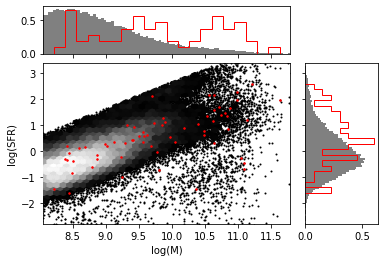

In [44]:
# Set up the figure axes
fig = plt.figure()
gs = GridSpec(4,4)
ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3], sharex=ax_joint)
ax_marg_y = fig.add_subplot(gs[1:4,3], sharey=ax_joint)



# make the hexbin plot:
plot_hexbin_scatter(ax_joint, logM, logSFR, mask_hosts, 
                    xlabel='log(M)', ylabel='log(SFR)',
                   gridsize=40, mincnt=20)

histout1a = ax_marg_x.hist(logM, color='0.5', bins=100, density=True)
histout1b = ax_marg_x.hist(logM[mask_hosts], color='r', bins=20, 
                           density=True, histtype='step')

histout2a = ax_marg_y.hist(logSFR, color='0.5', bins=100, 
                           density=True, orientation='horizontal')
histout2b = ax_marg_y.hist(logSFR[mask_hosts], color='r', bins=20, 
                           density=True, histtype='step', 
                           orientation='horizontal')

#ax_joint.plot(np.log10(hstsnhosts['mass']), np.log10(hstsnhosts['SFR']),
#              color='r', marker='.', ls=' ', zorder=100, ms=2)
ax_joint.set_xlim(8.05, 11.8)
ax_joint.set_ylim(-2.8, 3.4)

# Turn off tick labels on marginals
cruft = plt.setp(ax_marg_x.get_xticklabels(), visible=False)
cruft = plt.setp(ax_marg_y.get_yticklabels(), visible=False)